In [1]:
import numpy as np
import scipy.io

In [2]:
# define function that models the PA
def Find_out_PA(in_PA):
    alpha = [0.102974078888942 - 0.0242531514717656j, 556.793893042275 - 18.3137792997594j,-120312.406545669 + 15219.5681985834j, 14894006.4105878 + 406627.685820018j, 69183.7482281949 + 1888.61768262952j]
    in_PA_vector = np.column_stack([np.ones((len(in_PA))), in_PA, in_PA * (np.abs(in_PA)**2), in_PA * (np.abs(in_PA)**4), in_PA * (np.abs(in_PA)**6)])
    out_PA = np.dot(in_PA_vector,alpha)
    return out_PA

In [3]:
In_file = 'x_in_PA_Test.mat'
In_x = scipy.io.loadmat(In_file)

# X_Input has "n_examples" rows, and each row is a vector of "memory_complex_PAs+current_input" length
x_in_random = np.asarray(In_x['x'])

In [4]:
x_in_random = np.squeeze(x_in_random)
n_read_y = len(x_in_random) # #samples
gain_average = 500     # average gain for the PA
y_d_ref = x_in_random * gain_average    # find desired output of the PA

In [5]:
y_no_DPD = Find_out_PA(x_in_random)     # find output of PA (No DPD)

In [6]:
# prepare the loop
ILC_iteration = 50                     # #iterations for ILC
x_in_optimal = np.zeros(np.shape(y_d_ref),dtype = 'complex_')    # optimal input for the PA
y_out_PA     = np.zeros(np.shape(y_d_ref),dtype = 'complex_')    # linearized output of the PA
gamma_ILC = 2/5000                     # learning rate

In [9]:
# Main Loop, Find Optimal Input to PA
for i_read_y in range(n_read_y):
    y_d = y_d_ref[i_read_y]
    uk = y_d/gain_average;
    for i_ILC in range(1,ILC_iteration):
        yk = Find_out_PA([uk])
        ek = y_d - yk
        uk = uk + gamma_ILC * ek
    x_in_optimal[i_read_y] = uk
    y_out_PA[i_read_y]     = yk

In [10]:
# plot the spectrum of the desired output, with DPD, no DPD
# find the FFT of the outputs
fft_y_d = np.fft.fftshift(np.fft.fft(y_d_ref));       # desired output
fft_y_PA= np.fft.fftshift(np.fft.fft(y_out_PA));      # DPD output
fft_y_NDPD = np.fft.fftshift(np.fft.fft(y_no_DPD));   # No DPD output

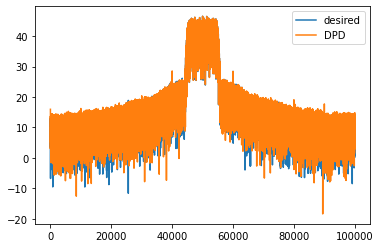

DPD NMSE =  -46.49207219356028  dB


In [14]:
import matplotlib.pyplot as plt
plt.plot(10*np.log10(abs(fft_y_d)), label="desired")
plt.plot(10*np.log10(abs(fft_y_PA)), label="DPD")
plt.legend()
plt.show()
NMSE_DPD = np.sum(np.abs(y_d_ref - y_out_PA)**2)/np.sum(np.abs(y_d_ref)**2)
print('DPD NMSE = ',10*np.log10(NMSE_DPD), ' dB')

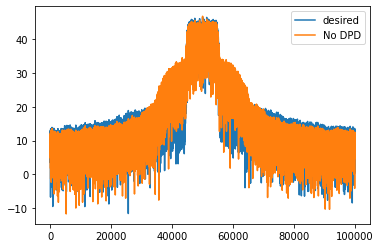

No DPD =  -16.690463310329857  dB


In [17]:
plt.plot(10*np.log10(abs(fft_y_d)), label="desired")
plt.plot(10*np.log10(abs(fft_y_NDPD)), label="No DPD")
plt.legend()
plt.show()
NMSE_noDPD = np.sum(np.abs(y_d_ref - y_no_DPD)**2)/np.sum(np.abs(y_d_ref)**2)
print('No DPD = ',10*np.log10(NMSE_noDPD), ' dB')